In [1]:
import numpy as np

# y = np.load('/scratch/lllei/inf1050_loc240/train/elf/inf1000/inc_t.npy')
# x = np.load('/scratch/lllei/inf1050_loc240/train/elf/inf1000//inc_p.npy')

# print('inc_t shape:', y.shape)
# print('inc_p shape:', x.shape)

inc_t shape: (3408000, 481)
inc_p shape: (3408000, 481)


In [9]:
a = np.load('elf.npy')
# var_y = np.sum((y-a*x)**2)/(x.shape[0]-2)
# std_a = (var_y / np.sum(x**2, axis=0)) ** 0.5 

# z_value = (a-0) / std_a

# ztest = abs(z_value) >= 1.282

# a_ztest = np.array([a[i] if (ztest[i]==True) and (i<200) else 0 for i in range(len(a))])
a_ztest = np.array([a[i] if i<260 else 0 for i in range(len(a))])


In [10]:
np.save('elf_ztest.npy', a_ztest)

<IPython.core.display.Javascript object>


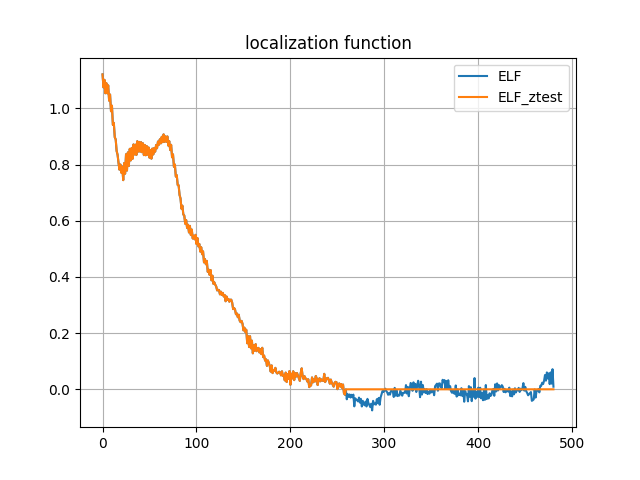

In [11]:
%matplotlib notebook
import sys 
# sys.path.append('/home/lllei/AI_localization/L05/git_repo/general')
sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')

from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')

plt.plot(range(loc_size), elf, label='ELF')
plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()

## fit GC tail

In [ ]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1
CMat = construct_GC_2d(240, model_size, obs_grids)


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')
elf_cat = np.concatenate((elf_ztest[0:130],CMat[0, 130:loc_size]),axis=0)

plt.plot(range(loc_size), CMat[0, 0:loc_size], color='g',label='GC240')
# plt.plot(range(loc_size), elf, label='ELF')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.plot(range(loc_size), elf_cat, color='red',label='ELF_cat')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.save('elf_cat.npy', elf_cat)

## moving average

In [ ]:
%matplotlib inline
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

model_size = 960
obs_density = 4
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
loc_size = int(model_size/2)+1
CMat = construct_GC_2d(240, model_size, obs_grids)


elf = np.load('elf.npy')
elf_ztest = np.load('elf_ztest.npy')
# elf_cat = np.concatenate((elf_ztest[0:130],CMat[0, 130:loc_size]),axis=0)

stride = 5
elf_extend = np.concatenate((elf_ztest[int((stride-1)/2):0:-1], elf_ztest, elf_ztest[-2:-2-int((stride-1)/2):-1]), axis=0)
elf_mva5 = moving_average(elf_extend,stride)
stride = 7
elf_extend = np.concatenate((elf_ztest[int((stride-1)/2):0:-1], elf_ztest, elf_ztest[-2:-2-int((stride-1)/2):-1]), axis=0)
elf_mva7 = moving_average(elf_extend,stride)

plt.plot(range(loc_size), CMat[0, 0:loc_size], color='g',label='GC240')
# plt.plot(range(loc_size), elf, label='ELF')
# plt.plot(range(loc_size), elf_ztest, label='ELF_ztest')
plt.plot(range(loc_size), elf_mva, color='red',label='ELF_mva5')
plt.plot(range(loc_size), elf_mva3, color='y',label='ELF_mva7')
# plt.plot(range(loc_size), elf_cat, color='red',label='ELF_cat')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.subplots_adjust(top=1.5,right=2)# show the figure
plt.show()

In [ ]:
np.save('elf_mva.npy', elf_mva7)

In [ ]:
elf_mva = np.load('elf_mva.npy')
plt.plot(range(loc_size), elf_mva, color='red',label='ELF_mva')
plt.title('localization function')
plt.legend()
plt.grid(True)
plt.subplots_adjust(top=1.5,right=2)# show the figure
plt.show()